# Capstone Project: Analysis of Stock price and forecasting using LSTM

## Rezoan Ahmed Shuvro

In [143]:
# Import libraries
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## Prediction using LSTM

In [144]:
import datetime
ticker ='AAPL'
# Microsoft
# Start and End date of the stock prices
start = datetime.datetime(2005, 1, 1)
end = datetime.datetime(2020, 6, 6)
df = data.DataReader(ticker, 'yahoo', start, end)

In [145]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995
2020-06-04,325.619995,320.779999,324.390015,322.320007,21890100.0,322.320007
2020-06-05,331.750000,323.230011,323.350006,331.500000,34289200.0,331.500000


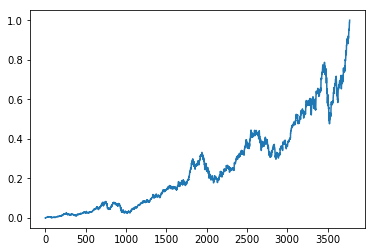

In [146]:
df_train = df.Close.loc['2005-01-01':'2019-12-31'].values
df_test = df.Close.loc['2020-01-01':'2024-05-31'].values
date_train = pd.date_range(start="2005-01-01",end="2019-12-31")
#scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df_train_scaled = sc.fit_transform(df_train.reshape(-1,1))
_=plt.plot(df_train_scaled)


In [147]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996
2020-06-03,326.200012,322.299988,324.660004,325.119995,26122800.0,325.119995
2020-06-04,325.619995,320.779999,324.390015,322.320007,21890100.0,322.320007
2020-06-05,331.750000,323.230011,323.350006,331.500000,34289200.0,331.500000


In [148]:
timestep =60

In [149]:
X_train = []
y_train = []
for i in range(timestep, 3775):
    X_train.append(df_train_scaled[i-timestep:i,0])
    y_train.append(df_train_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [150]:
# reshape
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

LSTM layers

In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [152]:
regressor = Sequential()

In [153]:
regressor.add(LSTM(units=100,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [154]:
regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

In [155]:
regressor.add(LSTM(units=100,return_sequences = True))
regressor.add(Dropout(0.2))

In [156]:
regressor.add(LSTM(units=100,return_sequences = False))
regressor.add(Dropout(0.2))

In [157]:
regressor.add(Dense(units=1))

In [158]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [159]:
#summary of the LSTM model
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 100)           40800     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 60, 100)           80400     
_________________________________________________________________
dropout_23 (Dropout)         (None, 60, 100)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               80400     
__________

In [160]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience =1,min_delta=0.01)

In [161]:
regressor.fit(X_train,y_train,epochs=10,batch_size=64, callbacks=[early_stopping_monitor])

Epoch 1/10
3715/3715 [==============================] - 31s 8ms/step - loss: 0.0107
Epoch 2/10
3715/3715 [==============================] - 26s 7ms/step - loss: 0.0012
Epoch 3/10
3715/3715 [==============================] - 29s 8ms/step - loss: 0.0010
Epoch 4/10
3715/3715 [==============================] - 30s 8ms/step - loss: 9.1715e-04
Epoch 5/10
3715/3715 [==============================] - 33s 9ms/step - loss: 8.9491e-04
Epoch 6/10
3715/3715 [==============================] - 33s 9ms/step - loss: 0.0010
Epoch 7/10
3715/3715 [==============================] - 29s 8ms/step - loss: 8.3988e-04
Epoch 8/10
3715/3715 [==============================] - 32s 9ms/step - loss: 8.4736e-04
Epoch 9/10
3715/3715 [==============================] - 29s 8ms/step - loss: 8.3094e-04
Epoch 10/10
3715/3715 [==============================] - 28s 8ms/step - loss: 8.7177e-04


In [162]:
df_total_arr = df.Close.values
inputs = df_total_arr[(len(df_total_arr))-len(df_test)-timestep:]
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [163]:
X_test = []
for i in range(timestep,len(inputs)):
    X_test.append((inputs[i-timestep:i,0]))
X_test = np.array(X_test)

In [164]:
# reshape and predicted stock price using the test dataset as rolling 
# This case is useful if one is interested to predict the next day's stock price. However, if one 
# wants to predict precides for a longer time in the future instead of using the test data (will not 
# be available) one needs to use the predicted stock price.

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price_before_normalize = predicted_stock_price
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price)

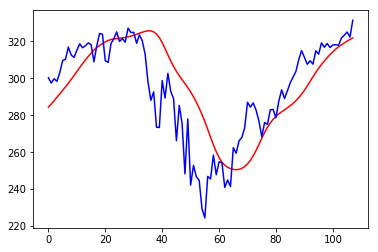

In [173]:
# Plot including test values for predcition
plt.plot(predicted_stock_price1,color='r')
plt.plot(df_test,color='B')

In [166]:
# 5 months prediction
predicted_stock_price = []
df_train = df.Close.loc['2005-01-01':'2019-12-31']
X_for_prediction = df_train.iloc[-61:-1].values
X_for_prediction = sc.transform(X_for_prediction.reshape(-1,1))
for i in range(103):
    data = X_for_prediction[-60:]
    data = np.reshape(data, (1, len(data), 1))
    prediction = regressor.predict(data)
    predicted_stock_price.append(prediction[0][0])
    X_for_prediction = np.append(X_for_prediction, prediction, axis = 0)
predicted_stock_price2 = np.reshape(predicted_stock_price, (len(predicted_stock_price), 1))
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

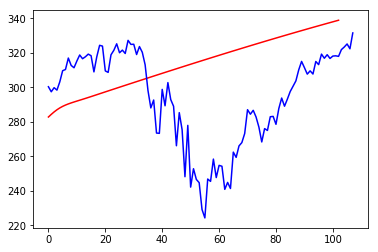

In [172]:
# Plot Without test values for predcition
plt.plot(predicted_stock_price2,color='r')
_= plt.plot(df_test,color='B')

In [170]:
# MSE including test values for predcition

np.sqrt(mean_squared_error(predicted_stock_price1,df_test))

19.20010169496747

In [171]:
# MSE Without test values for predcition
np.sqrt(mean_squared_error(predicted_stock_price2,df_test[:103]))

39.70716585438913